# **PROYECTO DE GRADO - MAESTRIA EN CIENCIA DE DATOS**
## Segmentación de profesionales de la salud del sector farmacéutico
### Santiago Reyes Zabaleta


## Bisecting K-Means
-------------------------------------------------------------------------------------

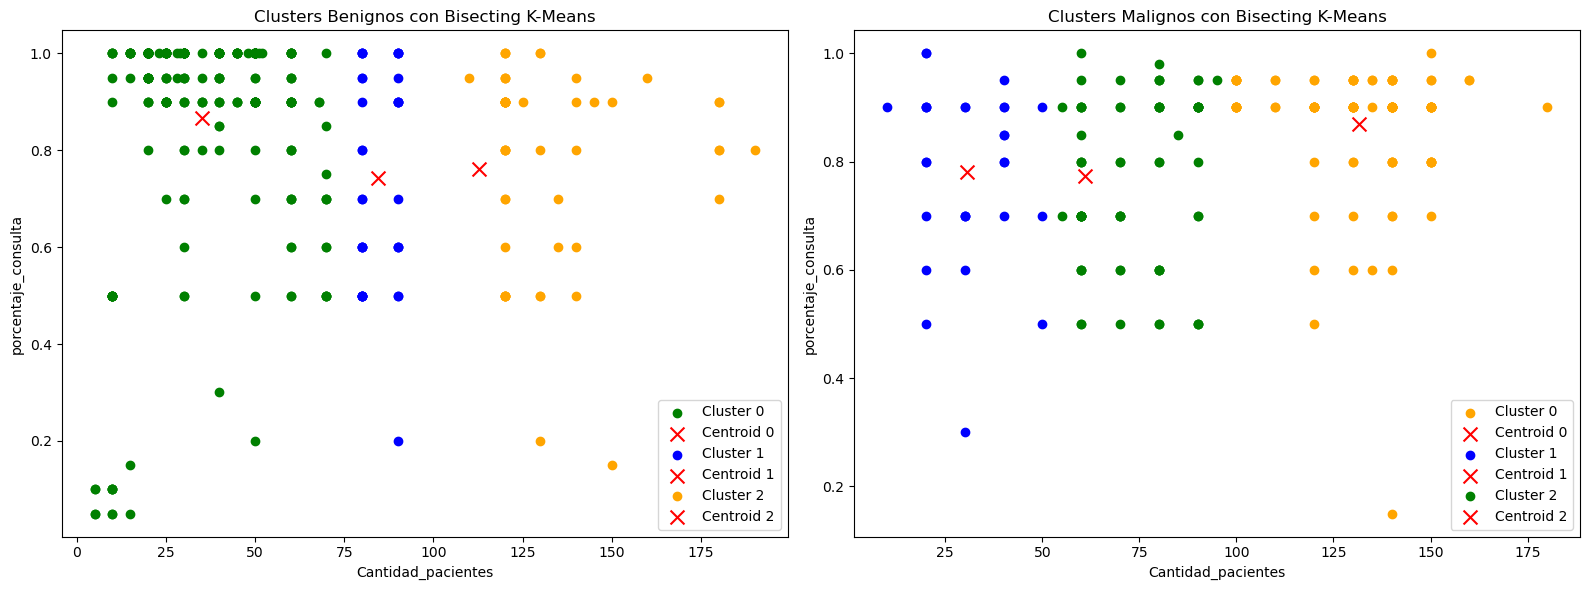

Coeficiente de Silhouette para datos benignos: 0.56
Coeficiente de Silhouette para datos malignos: 0.62


In [19]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Paso 1: Cargar los datos
data = pd.read_csv('data_cleaned.csv')

# Paso 2: Dividir la data por tipo de consulta
data_benigna = data[data['tipo_consulta'] == 'benigna']
data_maligna = data[data['tipo_consulta'] == 'maligna']

# Paso 3: Implementar K-Means Bisecting
def bisecting_kmeans(data, num_clusters):
    clusters = [data]
    labels = np.zeros(data.shape[0])
    centroids = []

    for cluster_id in range(1, num_clusters):
        # Encontrar el cluster con mayor inercia
        largest_cluster_idx = np.argmax([np.sum(np.var(cluster, axis=0)) for cluster in clusters])
        largest_cluster = clusters.pop(largest_cluster_idx)

        # Dividir el cluster usando K-Means con k=2
        kmeans = KMeans(n_clusters=2, random_state=42).fit(largest_cluster)
        sub_clusters = [largest_cluster[kmeans.labels_ == i] for i in range(2)]
        centroids.extend(kmeans.cluster_centers_)

        # Asignar etiquetas
        for i, sub_cluster in enumerate(sub_clusters):
            sub_cluster_indices = np.where(labels == largest_cluster_idx)[0][kmeans.labels_ == i]
            labels[sub_cluster_indices] = cluster_id if i == 1 else largest_cluster_idx

        clusters.extend(sub_clusters)

    return labels, clusters, centroids

# Paso 4: Determinar el número de clusters y aplicar Bisecting K-Means
num_clusters = 3
labels_benigna, clusters_benigna, centroids_benigna = bisecting_kmeans(data_benigna[['Cantidad_pacientes', 'porcentaje_consulta']].values, num_clusters)
labels_maligna, clusters_maligna, centroids_maligna = bisecting_kmeans(data_maligna[['Cantidad_pacientes', 'porcentaje_consulta']].values, num_clusters)

# Paso 5: Visualizar los resultados
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['green', 'blue', 'orange']  # Ajuste para benignos

# Visualizar clusters benignos
axes[0].set_title('Clusters Benignos con Bisecting K-Means')
for cluster_id in range(num_clusters):
    cluster_data = data_benigna[['Cantidad_pacientes', 'porcentaje_consulta']].values[labels_benigna == cluster_id]
    axes[0].scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')
    axes[0].scatter(centroids_benigna[cluster_id][0], centroids_benigna[cluster_id][1], color='red', marker='x', s=100, label=f'Centroid {cluster_id}')
axes[0].set_xlabel('Cantidad_pacientes')
axes[0].set_ylabel('porcentaje_consulta')
axes[0].legend()

# Visualizar clusters malignos
colors = ['orange', 'blue', 'green']  # Ajuste para malignos
axes[1].set_title('Clusters Malignos con Bisecting K-Means')
for cluster_id in range(num_clusters):
    cluster_data = data_maligna[['Cantidad_pacientes', 'porcentaje_consulta']].values[labels_maligna == cluster_id]
    axes[1].scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')
    axes[1].scatter(centroids_maligna[cluster_id][0], centroids_maligna[cluster_id][1], color='red', marker='x', s=100, label=f'Centroid {cluster_id}')
axes[1].set_xlabel('Cantidad_pacientes')
axes[1].set_ylabel('porcentaje_consulta')
axes[1].legend()

plt.tight_layout()
plt.show()

# Paso 6: Evaluar el modelo
silhouette_benigna = silhouette_score(data_benigna[['Cantidad_pacientes', 'porcentaje_consulta']].values, labels_benigna)
silhouette_maligna = silhouette_score(data_maligna[['Cantidad_pacientes', 'porcentaje_consulta']].values, labels_maligna)
print(f"Coeficiente de Silhouette para datos benignos: {silhouette_benigna:.2f}")
print(f"Coeficiente de Silhouette para datos malignos: {silhouette_maligna:.2f}")


# Evaluación de la Técnica de Clustering

## Observaciones Generales
La técnica de **Bisecting K-Means** aplicada para segmentar los Medicos que tratan la enfermedad de Gaucher no fue satisfactoria según el análisis realizado en conjunto con expertos en la materia.

## Análisis de Resultados
1. **Clusters Generados**:
   - Se obtuvieron tres clusters para cada tipo de consulta (benigna y maligna).
   - Los clusters presentan diferencias claras en el número de pacientes, pero carecen de una diferenciación evidente en el porcentaje de consulta.
   - La agrupación resultante muestra clusters distribuidos de manera **vertical**, lo cual no es consistente con las expectativas.

2. **Expectativas de los Expertos**:
   - Según los expertos en la enfermedad de Gaucher, los clusters deberían reflejar patrones claros de diferenciación basados en el porcentaje de consulta.
   - Este indicador es clave para segmentar a los pacientes de manera significativa y relevante desde el punto de vista clínico.

## Conclusión
La técnica utilizada no logró capturar la diferenciación esperada en las dimensiones relevantes para este caso (especialmente el porcentaje de consulta). Esto sugiere que:
- La selección de la técnica de clustering puede no ser adecuada para este conjunto de datos o problema específico.
- Podría ser necesario explorar otras técnicas de clustering o métodos más avanzados, como:
  - **Clustering jerárquico**.
  - **DBSCAN** o modelos basados en densidad.
  - Técnicas supervisadas si se cuenta con etiquetas adicionales.
- Se recomienda trabajar más estrechamente con los expertos para ajustar las variables de análisis y garantizar que las técnicas reflejen mejor la realidad clínica de los pacientes.
